<a href="https://colab.research.google.com/github/Murtadha9/Market_Sales_Machine_Learning/blob/main/Market_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset
The Supermarket Sales Dataset provides a comprehensive overview of supermarket transactions, tracking details such as product categories, unit prices, quantities sold, and gross income. It also includes customer demographics, such as gender, payment method, and membership type. This dataset is ideal for analyzing sales trends, customer behavior, and revenue performance, offering insights to optimize promotions and product strategies.

[https://www.kaggle.com/datasets/willianoliveiragibin/market-sales-data/data]

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [54]:
! kaggle datasets download willianoliveiragibin/market-sales-data

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/market-sales-data
License(s): CC0-1.0
market-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
!unzip /content/market-sales-data.zip

Archive:  /content/market-sales-data.zip
replace supermarket_sales new.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, feature_selection, svm, metrics, pipeline, preprocessing , impute , tree , ensemble , neighbors , linear_model
import seaborn as sns
from tqdm import tqdm
from imblearn.over_sampling import RandomOverSampler

In [57]:
dataset=pd.read_csv("/content/supermarket_sales new.csv")

In [58]:
dataset

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...,...
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [60]:
dataset.isna().sum()

,0
Gender,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0


In [61]:
dataset.duplicated().sum()

0

In [62]:
dataset.columns.to_list()

['Gender',
 'Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%']

Text(0.5, 1.0, 'Gender Distribution')

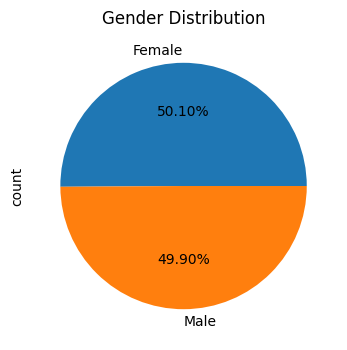

In [63]:
plt.figure(figsize = (4,4))
dataset['Gender'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Branch Distribution')

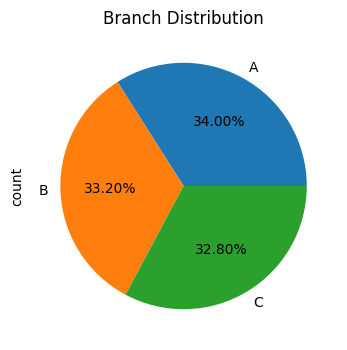

In [64]:
plt.figure(figsize = (4,4))
dataset['Branch'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Branch Distribution')

Text(0.5, 1.0, 'city Distribution')

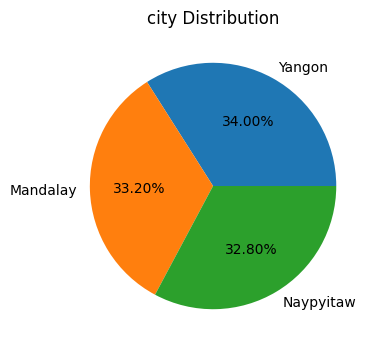

In [65]:
plt.figure(figsize = (4,4))
dataset['City'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.ylabel('')
plt.title('city Distribution')

Text(0.5, 1.0, 'customer Distribution')

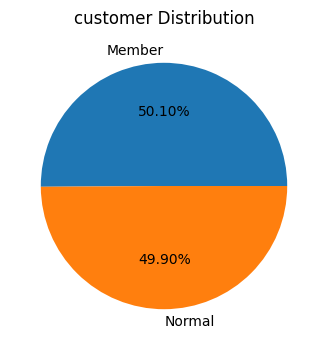

In [66]:
plt.figure(figsize = (4,4))
dataset['Customer type'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.ylabel('')
plt.title('customer Distribution')

#One_Hot Encoder

In [67]:
encoder=preprocessing.LabelEncoder()

dataset["Gender"]=encoder.fit_transform(dataset["Gender"])
dataset["Branch"]=encoder.fit_transform(dataset["Branch"])
dataset["City"]=encoder.fit_transform(dataset["City"])
dataset["Customer type"]=encoder.fit_transform(dataset["Customer type"])
dataset["Product line"]=encoder.fit_transform(dataset["Product line"])
dataset["Invoice ID"]=encoder.fit_transform(dataset["Invoice ID"])

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   int64  
 1   Invoice ID     1000 non-null   int64  
 2   Branch         1000 non-null   int64  
 3   City           1000 non-null   int64  
 4   Customer type  1000 non-null   int64  
 5   Product line   1000 non-null   int64  
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


#Normalization

In [69]:
dataset['Total Sales'] = dataset['Unit price'] * dataset['Quantity'] + dataset['Tax 5%']
x = dataset.drop(['Total Sales', 'Invoice ID'], axis=1)
y = dataset['Total Sales']

scaler=preprocessing.StandardScaler()
x_norm=scaler.fit_transform(x)
y_norm=scaler.fit_transform(y.values.reshape(-1, 1))

In [70]:
x_norm.shape , y_norm.shape

((1000, 8), (1000, 1))

#Cross Validation

In [71]:
def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

In [72]:

k_fold = model_selection.KFold(
    n_splits=10
)  # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty arrays to store the scores
MSE = []
MAE = []
R2_score = []

for train_indices, test_indices in k_fold.split(x_norm):
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x_norm, y_norm, train_indices, test_indices
    )

    # Train model
    #Model = svm.SVR()
    Model=linear_model.LinearRegression()
    #Model=neighbors.KNeighborsRegressor(n_neighbors=5)
    Model.fit(x_train, y_train)

    # Predict using test set
    y_pred = Model.predict(x_test)

    # Calculate scores
    MSE.append( metrics.mean_squared_error(y_test, y_pred))
    MAE.append( metrics.mean_absolute_error(y_test, y_pred))
    R2_score.append(metrics.r2_score(y_test, y_pred))

In [73]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"MSE": MSE,
                          "MAE": MAE,
                          "R2_score":R2_score})
scores_df

,MSE,MAE,R2_score
0,0.069963,0.209147,0.936776
1,0.080798,0.223669,0.914494
2,0.073949,0.199862,0.912741
3,0.071384,0.200660,0.943479
4,0.082424,0.225980,0.916351
5,0.084155,0.214264,0.925486
6,0.053373,0.175346,0.918257
7,0.072219,0.207510,0.920815
8,0.068753,0.205013,0.937774
9,0.077146,0.211255,0.904941


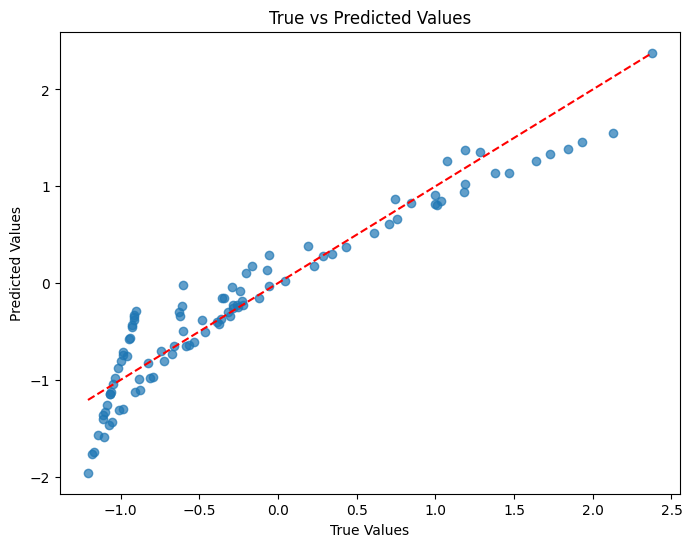

In [74]:
y_pred = Model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()